In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil, os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

In [2]:
#Crear las carpetas para subir las imagenes
!mkdir cats
!mkdir dogs
!mkdir raccoons

In [3]:
#Entrar en cada carpeta y descomprimir el archivo zip
%cd cats
!unzip cats.zip
%cd ..

%cd dogs
!unzip dogs.zip
%cd ..

%cd raccoons
!unzip raccoons.zip
%cd ..

/content/cats
Archive:  cats.zip
  inflating: cat (1).jpeg            
  inflating: cat (1).jpg             
  inflating: cat (2).jpeg            
  inflating: cat (2).jpg             
  inflating: cat (3).jpeg            
  inflating: cat (3).jpg             
  inflating: cat (4).jpeg            
  inflating: cat (4).jpg             
  inflating: cat (5).jpeg            
  inflating: cat (5).jpg             
  inflating: cat (6).jpeg            
  inflating: cat (6).jpg             
  inflating: cat (7).jpeg            
  inflating: cat (7).jpg             
  inflating: cat (8).jpeg            
  inflating: cat (8).jpg             
  inflating: cat (9).jpeg            
  inflating: cat (9).jpg             
  inflating: cat (10).jpeg           
  inflating: cat (10).jpg            
  inflating: cat (11).jpeg           
  inflating: cat (11).jpg            
  inflating: cat (12).jpeg           
  inflating: cat (12).jpg            
  inflating: cat (13).jpeg           
  inflating: cat 

In [4]:
#Borrar los archivo ZIP
!rm -rf /content/cats/cats.zip
!rm -rf /content/dogs/dogs.zip
!rm -rf /content/raccoons/raccoons.zip

In [5]:
#Mostrar cuantas imagenes tengo de cada categoria
!ls /content/cats | wc -l #107
!ls /content/dogs | wc -l #140
!ls /content/raccoons | wc -l #115

107
140
115


In [6]:
#Crear carpetas para hacer el set de datos

!mkdir dataset
!mkdir dataset/cat
!mkdir dataset/dog
!mkdir dataset/raccoon

In [7]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 107 (el num. menor de imagenes que subi)

carpeta_fuente = '/content/cats'
carpeta_destino = '/content/dataset/cat'

imagenes = os.listdir(carpeta_fuente)

for i, imgN in enumerate(imagenes):
  if i < 107:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + imgN, carpeta_destino + '/' + imgN)

In [8]:
carpeta_fuente = '/content/dogs'
carpeta_destino = '/content/dataset/dog'

imagenes = os.listdir(carpeta_fuente)

for i, imgN in enumerate(imagenes):
  if i < 107:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + imgN, carpeta_destino + '/' + imgN)

In [9]:
carpeta_fuente = '/content/raccoons'
carpeta_destino = '/content/dataset/raccoon'

imagenes = os.listdir(carpeta_fuente)

for i, imgN in enumerate(imagenes):
  if i < 107:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + imgN, carpeta_destino + '/' + imgN)

In [10]:
#Mostrar cuantas imagenes tengo de cada categoria en el dataset
!ls /content/dataset/cat | wc -l
!ls /content/dataset/dog | wc -l
!ls /content/dataset/raccoon | wc -l

107
107
107


Found 256 images belonging to 3 classes.
Found 63 images belonging to 3 classes.


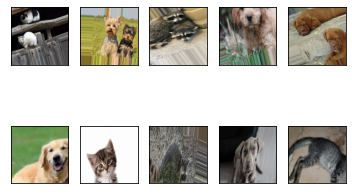

In [11]:
#Aumento de datos con ImageDataGenerator
#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [12]:
url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [13]:
#Congelar el modelo descargado
mobilenetv2.trainable = False

In [14]:
model = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(3, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
#Entrenar el modelo
EPOCHS = 50

historial = model.fit(
    data_gen_entrenamiento, epochs=EPOCHS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 1.3744 - accuracy: 0.3242

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


8/8 [==============================] - 22s 2s/step - loss: 1.3744 - accuracy: 0.3242 - val_loss: 1.0306 - val_accuracy: 0.4444
Epoch 2/50
8/8 [==============================] - 18s 2s/step - loss: 0.7414 - accuracy: 0.7148 - val_loss: 0.5231 - val_accuracy: 0.8254
Epoch 3/50
8/8 [==============================] - 17s 2s/step - loss: 0.4542 - accuracy: 0.8750 - val_loss: 0.4474 - val_accuracy: 0.8413
Epoch 4/50
8/8 [==============================] - 18s 2s/step - loss: 0.2765 - accuracy: 0.9336 - val_loss: 0.4108 - val_accuracy: 0.8095
Epoch 5/50
8/8 [==============================] - 17s 2s/step - loss: 0.2621 - accuracy: 0.9414 - val_loss: 0.2810 - val_accuracy: 0.8889
Epoch 6/50
8/8 [==============================] - 18s 2s/step - loss: 0.2470 - accuracy: 0.9219 - val_loss: 0.3074 - val_accuracy: 0.8889
Epoch 7/50
8/8 [==============================] - 18s 2s/step - loss: 0.2053 - accuracy: 0.9219 - val_loss: 0.3953 - val_accuracy: 0.8889
Epoch 8/50
8/8 [=============================

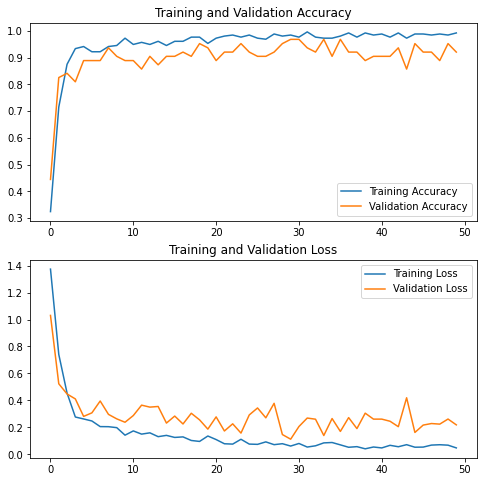

In [18]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

# rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2,1,2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
#Evaluacion y prediccion
loss, accuracy = model.evaluate(data_gen_pruebas)
print('Test accuracy :', accuracy)

1/2 [==============>...............] - ETA: 2s - loss: 0.3047 - accuracy: 0.8750

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


2/2 [==============================] - 4s 2s/step - loss: 0.3325 - accuracy: 0.8571
Test accuracy : 0.8571428656578064


In [20]:
#Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = model.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

In [21]:
#0 = cat, 1 = dog, 2 = raccoon
url = 'https://images.sipse.com/OTACcQamTytfykyXLpoMWvOWPoU=/1654x1016/smart/2018/08/03/1533336673139.jpg' #debe ser 0
prediccion = categorizar (url)
print(prediccion)

0


In [22]:
url = 'https://www.perrosamigos.com/Uploads/perrosamigos.com/ImagenesGrandes/perro-weimaraner-0-2.jpg' #debe ser 1
prediccion = categorizar (url)
print(prediccion)

1


In [23]:
url = 'https://elpolitico.com/wp-content/uploads/2017/03/Mapache.jpg' #debe ser 2
prediccion = categorizar (url)
print(prediccion)

2


In [60]:
def getType(imgName, lst):
  if 'raccoon' in imgName: 
    lst.append(2)
  elif 'cat' in imgName: 
    lst.append(0)
  else: 
    lst.append(1)

In [51]:
from PIL import Image
from io import BytesIO
import cv2
def classificationImg(folder):
  imgs = os.listdir(folder)
  results = []
  types = []
  imags = []
  imgsInf = []
  k = 0
  for i in enumerate(imgs):
    if i[-1] != '.ipynb_checkpoints':
      getType(i[-1], types)
      img = Image.open(folder + '/' + i[-1])
      imgsInf.append(img)
      img = np.array(img).astype(float)/255
      img = cv2.resize(img, (224,224))
      prediccion = model.predict(img.reshape(-1, 224, 224, 3))
      prediccion = np.argmax(prediccion[0], axis=-1)
      results.append(prediccion)
      imags.append(i[-1])
  return results, imgsInf, types

In [40]:
def getText(opcion):
  if opcion == 0: return 'cat'
  if opcion == 1: return 'dog'
  if opcion == 2: return 'raccoon'

Predicciones: [2, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1]
Esperado: [2, 0, 2, 2, 1, 2, 0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1]


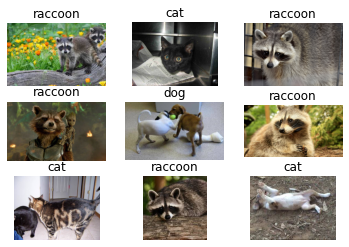

In [61]:
folder = '/content/folder'
tps = []
results, imgs, types = classificationImg(folder)
print(f"Predicciones: {results}")
print(f"Esperado: {types}")
for i in range(9):
  ax = plt.subplot(3, 3, i+1)
  plt.imshow(imgs[i])
  plt.title(getText(results[i]))
  plt.axis("off")